# Лаборатоная работа №3
## Задание
- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
- Разделите данные на обучающий и тестовый наборы данных.
- Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.
- Постройте **три модели** с различными наборами признаков.
- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.
- Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.
- Бонусное задание
    - Ввести синтетический признак при построении модели


# Ход работы

## Импортируем библиотеки

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Получаем данные из файла

In [57]:
data = pd.read_csv("california_housing_train.csv")
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Визуализируем данные

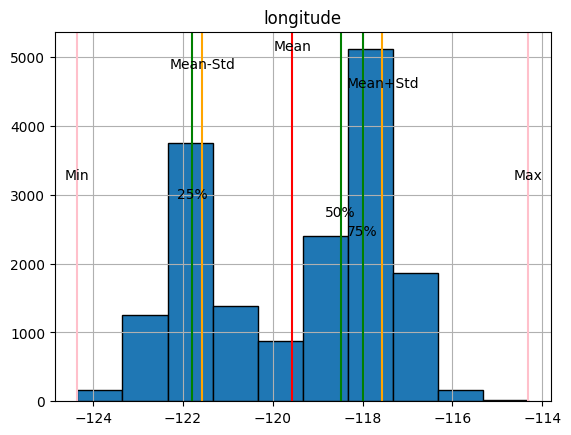

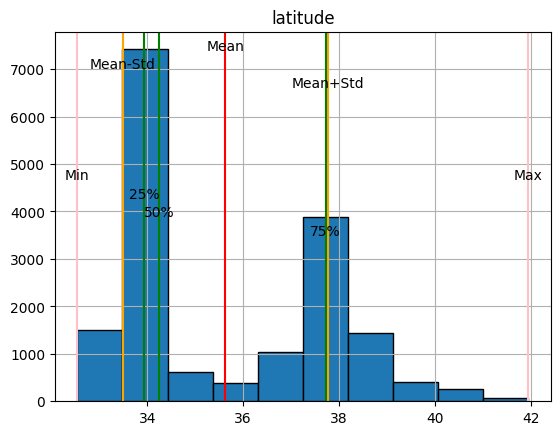

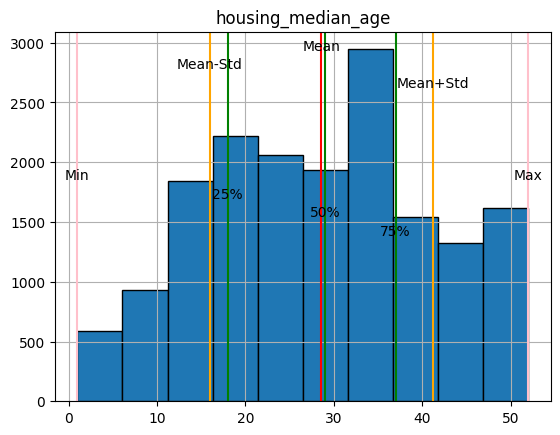

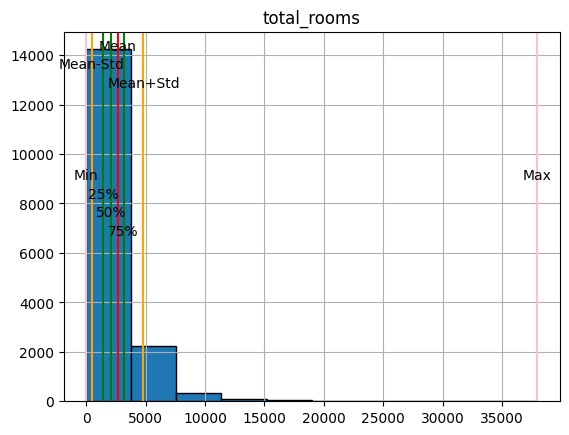

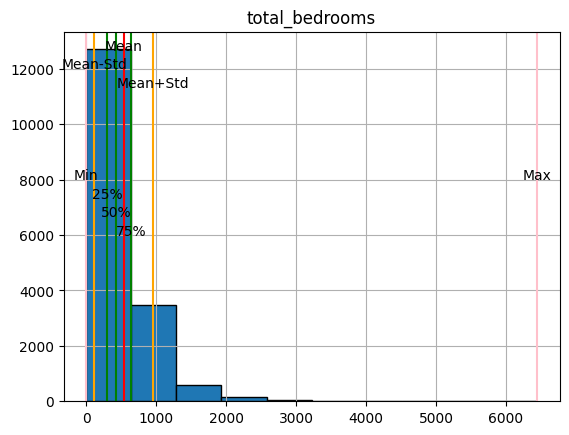

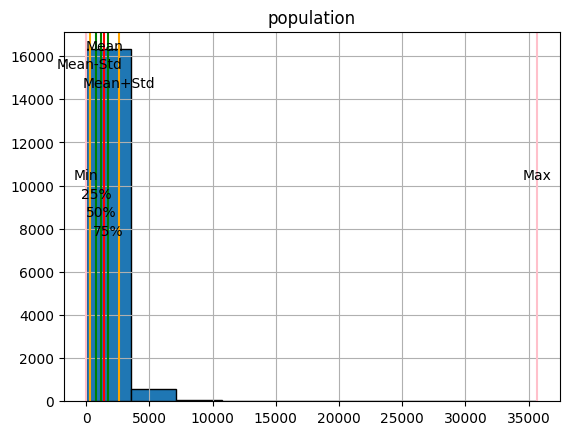

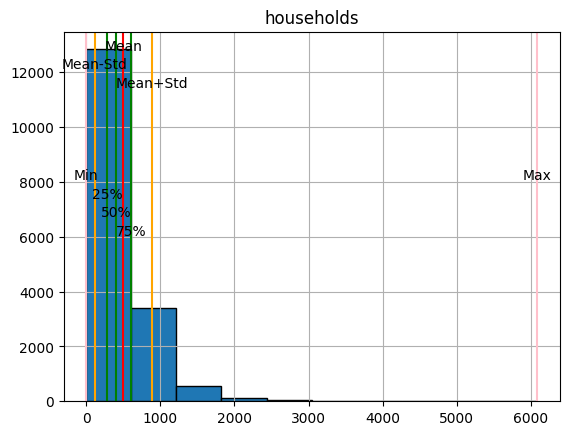

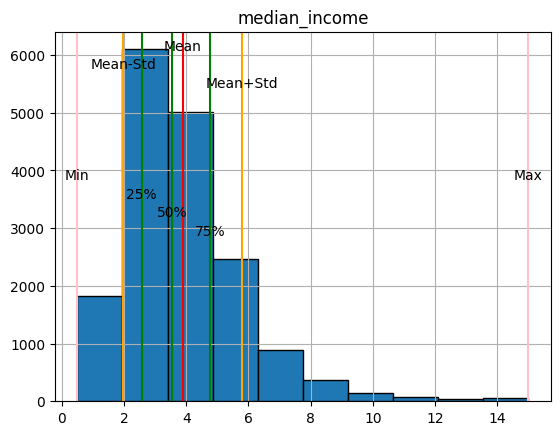

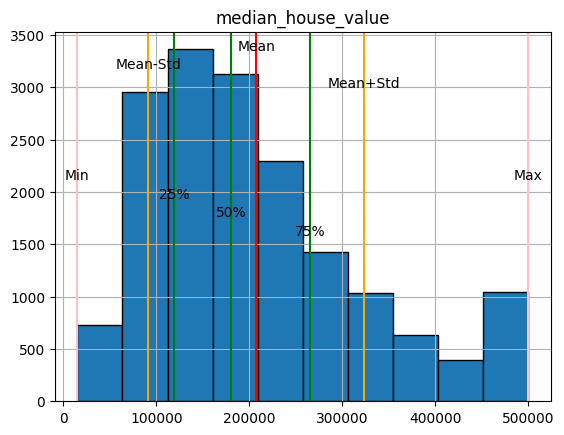

In [58]:
description = data.describe()
bins_count = 1 + int(math.log(description[description.columns[0]]["count"]))
for column in description.columns:
    plt.figure()
    data[column].hist(bins=bins_count, edgecolor="black")
    
    mean = description[column]["mean"]
    std = description[column]["std"]
    min_value = description[column]["min"]
    p25 = description[column]["25%"]
    p50 = description[column]["50%"]
    p75 = description[column]["75%"]
    max_value = description[column]["max"]
    
    plt.title(column)
    
    plt.axvline(mean, color="red")
    plt.text(mean, plt.ylim()[1]*0.95, "Mean", ha="center")
    
    plt.axvline(mean-std, color="orange")
    plt.text(mean-std, plt.ylim()[1]*0.9, "Mean-Std", ha="center")
    plt.axvline(mean+std, color="orange")
    plt.text(mean+std, plt.ylim()[1]*0.85, "Mean+Std", ha="center")
    
    plt.axvline(min_value, color="pink")
    plt.text(min_value, plt.ylim()[1]*0.6, "Min", ha="center")
    plt.axvline(max_value, color="pink")
    plt.text(max_value, plt.ylim()[1]*0.6, "Max", ha="center")
    
    plt.axvline(p25, color="green")
    plt.text(p25, plt.ylim()[1]*0.55, "25%", ha="center")
    plt.axvline(p50, color="green")
    plt.text(p50, plt.ylim()[1]*0.5, "50%", ha="center")
    plt.axvline(p75, color="green")
    plt.text(p75, plt.ylim()[1]*0.45, "75%", ha="center")
    
    plt.show()
    
    

## Чистка данных
Проверяем на пустые строки и пропущенные значения (такого не нашлось)

In [59]:
missing_values = data.isnull().sum()
print("Missing values per column:", missing_values, sep="\n")
rows_to_delete = data.isnull().any(axis=1).sum()
data = data.dropna()
print("Deleted rows:", rows_to_delete)

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
Deleted rows: 0


## Нормирование данных

In [60]:
data_norm = (data - data.mean()) / data.std()
print(data_norm)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       2.619288 -0.671500           -1.079639     1.361655        1.764152   
1       2.539494 -0.573248           -0.761850     2.296540        3.230346   
2       2.494610 -0.905436           -0.920744    -0.882436       -0.866931   
3       2.489623 -0.928830           -1.159087    -0.524171       -0.480216   
4       2.489623 -0.961581           -0.682402    -0.545731       -0.506313   
...          ...       ...                 ...          ...             ...   
16995  -2.342894  2.318197            1.859916    -0.195722       -0.344985   
16996  -2.347881  2.369663            0.588757    -0.135170       -0.027072   
16997  -2.362842  2.907715           -0.920744     0.015292       -0.019955   
16998  -2.362842  2.889000           -0.761850     0.012998        0.029868   
16999  -2.387778  2.299482            1.859916    -0.377837       -0.567998   

       population  households  median_income  media

## Выделяем обучающие и тестовые данные
85% для обучения и 15% для тестов

In [61]:
X = data_norm.drop(columns=["median_income"])
y = data_norm["median_income"]

train_size = int(X.shape[0] * 0.85)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((14450, 8), (2550, 8), (14450,), (2550,))

## Реализация линейной регрессии

In [66]:
def linear_regression(X, y, learning_rate=0.01, iterations_num=2000):
    n_samples, n_features = X.shape
    bias, weights = 0, np.zeros(n_features)
    
    for _ in range(iterations_num):
        # Предсказание
        y_pred = X @ weights + bias
        
        # Вычисление градиентов
        db = 1 / n_samples * np.sum(y_pred - y)
        dw = 1 / n_samples * X.T @ (y_pred - y)
        
        # Обновление параметров
        bias -= learning_rate * db
        weights -= learning_rate * dw
    
    return bias, weights


0.016418210412003035
longitude             0.009273
latitude              0.025478
housing_median_age   -0.146553
total_rooms           0.792267
total_bedrooms       -0.601358
population            0.080738
households           -0.284904
median_house_value    0.657802
dtype: float64


## Реализация функции r2
Показывает коэффициент детерминации
* Если r2 = 1 - модель прекрасно предсказала все значения
* Если r2 = 0 - модель предсказала на уровне среднего значения данных
* Если r2 < 0 - модель предсказала хуже, чем просто среднее значение

In [63]:
def r2(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    
    mean_y = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y) ** 2) 
    ss_res = np.sum((y_true - y_pred) ** 2) 
    r2_res = 1 - (ss_res / ss_tot)
    return r2_res

## Проверка разных моделей
### Модель 1
Все признаки сохранены
Результат r2=0.6303113297364609

In [67]:
bias_model1, weights_model1 = linear_regression(X_train, y_train)
y_pred_model1 = X_test @ weights_model1 + bias_model1
r2_model1 = r2(y_test, y_pred_model1)
print(r2_model1)

0.6303113297364609


### Модель 2
Сохраним только данные по количеству комнат и спален
Результат r2=0.24320690468282935

In [80]:
X_train_model2 = X_train.iloc[:, [3, 4]]
X_test_model2 = X_test.iloc[:, [3, 4]]

bias_model2, weights_model2 = linear_regression(X_train_model2, y_train)
y_pred_model2 = X_test_model2 @ weights_model2 + bias_model2
r2_model2 = r2(y_test, y_pred_model2)
print(r2_model2)

0.24320690468282935


### Модель 3
Сохраним только данные по долготе, широте и среднему возрасту дома
Результат r2=0.06528562361119628

In [82]:
X_train_model3 = X_train.iloc[:, [0, 1, 2]]
X_test_model3 = X_test.iloc[:, [0, 1, 2]]

bias_model3, weights_model3 = linear_regression(X_train_model3, y_train)
y_pred_model3 = X_test_model3 @ weights_model3 + bias_model3
r2_model3 = r2(y_test, y_pred_model3)
print(r2_model3)

0.06528562361119628


### Модель 3
Добавим синтетический признак - количество комнат на владельца rooms_per_household
Результат r2=0.6410496559067105

In [85]:
new_data = data.copy()
new_data["rooms_per_household"] = new_data["total_rooms"] / new_data["households"]
new_data_norm = (new_data - new_data.mean()) / new_data.std()

new_X = new_data_norm.drop(columns=["median_income"])
new_X_train, new_X_test = new_X[:train_size], new_X[train_size:]

bias_model4, weights_model4 = linear_regression(new_X_train, y_train)
y_pred_model4 = new_X_test @ weights_model4 + bias_model4
r2_model4 = r2(y_test, y_pred_model4)
print(r2_model4)

0.6410496559067105
